In [60]:
# Loading the model dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc, average_precision_score, classification_report

### Loading the dataset

In [3]:
ad_data = pd.read_csv("advertising.csv")

In [5]:
# Loading first 5 heads of the dataset
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
# Making a copy of our dataset
ad_data1 = ad_data.copy()

In [7]:
# Making changes to the datetime format of the copyed dataset
import datetime as dt
ad_data1['Timestamp'] = pd.to_datetime(ad_data1['Timestamp'])
ad_data1['Month'] = ad_data1['Timestamp'].dt.month
ad_data1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6


### Performing an EDA of the Dates


C:\Users\hp\AppData\Local\Temp\ipykernel_18916\1203258712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_data1['Timestamp'].dt.month, kde = False, rug = True)


<Axes: xlabel='Timestamp'>

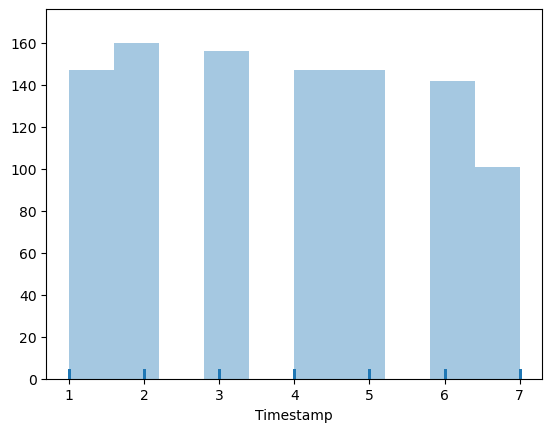

In [10]:
# Performing a distribution plot of the dates in terms of the month
sns.distplot(ad_data1['Timestamp'].dt.month, kde = False, rug = True)

In [13]:
# Creating Dummy variables for the Month and Country
month_dummy = pd.get_dummies(ad_data1['Month'], drop_first = True) # Dummy variable for month
country_dummy = pd.get_dummies(ad_data1['Country'], drop_first = True) # Dummy variable for Countries

In [14]:
# Dropping off the categorical variables
# First of all obtaining the columns of the dataset
ad_data1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Month'],
      dtype='object')

In [15]:
# Dropping off categorical data variables
X1 = ad_data1.drop(columns = ['Clicked on Ad', 'City', 'Ad Topic Line', 'Country', 'Timestamp', 'Month'], axis = 1)
X1.head() # Variables for training our model

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [16]:
# Concatinating the X1 with country_dummy and month_dummies
X1 = pd.concat([X1, month_dummy, country_dummy], axis = 1)
X1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,2,3,4,5,6,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,80.23,31,68441.85,193.77,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,69.47,26,59785.94,236.50,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,74.15,29,54806.18,245.89,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,68.37,35,73889.99,225.58,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [17]:
def scale_true_false_columns(df):

    # Identify True/False columns
    true_false_cols = df.select_dtypes(include=['bool']).columns

    # Create a MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the True/False columns
    df[true_false_cols] = scaler.fit_transform(df[true_false_cols])

    return df  # Return the dataframe with scaled True/False columns

In [24]:
## Converting non-string type columns to strings for consistency
X1.columns = X1.columns.astype(str) # Converts all  columns to strings

In [25]:
X1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,2,3,4,5,6,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,80.23,31,68441.85,193.77,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,69.47,26,59785.94,236.50,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,74.15,29,54806.18,245.89,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,68.37,35,73889.99,225.58,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Now converting all bool dummies to values between 0 and 1
X1 =  scale_true_false_columns(X1)

In [27]:
X1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,2,3,4,5,6,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.23,31,68441.85,193.77,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,69.47,26,59785.94,236.50,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74.15,29,54806.18,245.89,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,68.37,35,73889.99,225.58,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y = ad_data1['Clicked on Ad']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [32]:
# Splitting our dataset into train and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size = 0.2, random_state = 42)

In [33]:
# Determining the shape of the dataset
print(X_train.shape, X_test.shape)

(800, 247) (200, 247)


In [35]:
# Perfomring data standardization
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [41]:
# Performing Training and Predictions of the dataset
Model = LogisticRegression(solver = 'lbfgs')

In [42]:
Model.fit(X_train, y_train)

LogisticRegression()

In [40]:
# Making predictions on the testing dataset
y_test_pred = Model.predict(X_test)

In [44]:
# Determinin the accuracy of the testing dataset
print("Accuracy of testing data:", accuracy_score(y_test, y_test_pred))

Accuracy of testing data: 0.91


In [45]:
# Making predictions on the testing dataset
y_train_pred = Model.predict(X_train)

In [46]:
# Determining the accuracy of the training dataset
print("Accuracy of training data:", accuracy_score(y_train, y_train_pred))

Accuracy of training data: 0.99875


### Moel Evaluation

In [71]:
def RocAuc(xtest, ytest, Model):
    # Drawing of the roc curve and calculating area under the curve
    probs = Model.predict_proba(xtest)
    probs = probs[:,1]
    auc = roc_auc_score(ytest, probs)
    print("AUC: %.3f" %(auc))
    fpr, tpr, thresholds  = roc_curve(ytest, probs)
    _ = plt.plot([0,1],[0,1], linestyle = '--')
    _ = plt.plot(fpr, tpr, marker = '.')
    _ = plt.xlabel("False Positive Rate")
    _ = plt.ylabel("True Positive Rate")
    _ = plt.title(" Reciever Operating Characteristics")
    plt.show()


# Precision and Recall, F1 score, recall, auc
def Prerecall(xtest, ytest, Model, predictions):
    probs = Model.predict_proba(xtest)
    probs = probs[:,1]
    precision, recall, threshold = precision_recall_curve(ytest, probs)
    f1 = f1_score(ytest, predictions)
    auc1 = auc(recall, precision)
    ap = average_precision_score(ytest, probs)
    print("f1 = %.3f auc = %.3f ap = %.3f" %(f1, auc1, ap))
    _ = plt.plot([0,1],[0.5, 0.5], linestyle = '--')
    _ = plt.plot(recall, precision, marker = '.')
    plt.show()

def Coefsum(X,y):
    import statsmodels.api as sm
    logit_model = sm.Logit(y,X)
    res = logit_model.fit()
    print(res.summary())

In [55]:
# printing the classification report of the dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        89
           1       0.95      0.88      0.92       111

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



f1 = 0.916 auc = 0.970 ap = 0.970


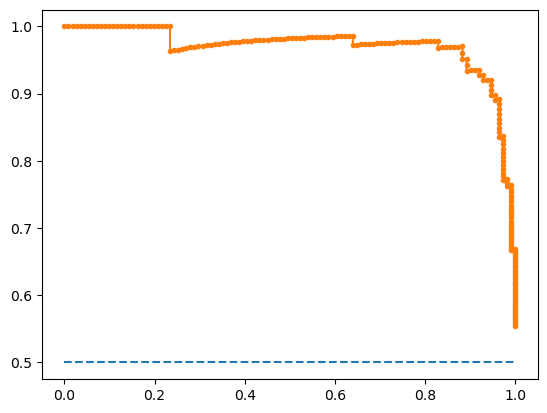

In [64]:
# Precision-Recall curve
Prerecall(X_test, y_test, Model, y_test_pred)

AUC: 0.967


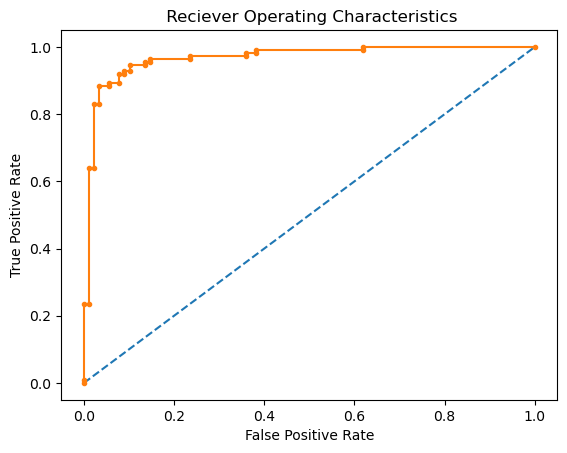

In [72]:
# Determining the ROC Curve of the plot
RocAuc(X_test, y_test, Model)

In [ ]:
# Model Evaluation: The ROC curve indicates better model performance with a score of 0.967